In [1]:
from plotnine import * 
from sklearn.preprocessing import LabelEncoder #codificación de variables categóricos a números correlativos
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

# Visualización: Práctica 2 Gráficos con ggplot2

1. Utilizar la librería ggplot o su equivalente plotnine para realizar los siguientes gráficos sobre los Precios de productos agrícolas de Canarias:
    - Gráfico de dispersión de los precios de al menos 4 cultivos.
    - Gráfico de la evolución de la media mensual de precios de 4 cultivos en cada una de las islas.
    - Distribución de los precios de 4 cultivos en todas las islas.
2. Realizar un análisis exploratorio de datos basado en gráficos del dataset de Tráfico Marítimo utilizando la librería ggplot2 o su equivalente plotnine para python.

En esta práctica vamos a aplicar la gramática de gráficos de Wickham, la cual consiste en construir un gráfico de con una serie de pasos establecidos, los cuales iremos explicando en cada visualización.

In [2]:
# Cargamos el dataset
# ===========================================================
df = pd.read_csv('Precios_2019_20.csv', encoding="unicode-escape",  sep = ';', on_bad_lines='skip')
df.head(10)

,Zona,Cultivo,Año,Mes,Precio
0,CANARIAS,Aguacate,2016,Enero,1.89
1,CANARIAS,Aguacate,2016,Febrero,1.97
2,CANARIAS,Aguacate,2016,Marzo,1.93
3,CANARIAS,Aguacate,2016,Abril,2.09
4,CANARIAS,Aguacate,2016,Mayo,2.42
5,CANARIAS,Aguacate,2016,Junio,2.88
6,CANARIAS,Aguacate,2016,Julio,3.36
7,CANARIAS,Aguacate,2016,Agosto,3.72
8,CANARIAS,Aguacate,2016,Septiembre,3.18
9,CANARIAS,Aguacate,2016,Octubre,1.87


In [3]:
# Observamos los valores únicos de las variables categóricas
# ===========================================================
print(df['Zona'].unique())
print(df['Cultivo'].unique())
print(df['Año'].unique())
print(df['Mes'].unique())

['CANARIAS' 'Gran_Canaria' 'Tenerife' 'La_Palma']
['Aguacate' 'Bata/Boniato' 'Berenjena' 'Berro' 'Br¾coli/BrÚcol' 'Bubango'
 'CalabacÝn' 'Calabaza' 'Cebolla' 'Cebolleta' 'Col' 'Coliflor' 'Fresa'
 'JudÝa_Verde' 'Lechuga/achicoria' 'Lim¾n' 'Mango' 'Mel¾n' 'Naranja'
 'Papa' 'Papaya' 'Pepino' 'Pimiento' 'Pi±a(Ananßs)' 'Pi±a_de_millo/maÝz'
 'Plßtano' 'Puerro' 'SandÝa' 'Tomate' 'Zanahoria' 'Uva']
[2016 2017 2018 2019]
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


In [4]:
# Reemplazamos aquellos registros que no está correctamente escritos 
# por los correctos
# ===========================================================

df= df.replace(['CalabacÝn','JudÝa_Verde', 'Lim¾n', 'Mel¾n', 'Pi±a(Ananßs)', 'Pi±a_de_millo/maÝz','Plßtano', 'SandÝa','Br¾coli/BrÚcol'],
           ['Calabacín', 'Judia_Verde', 'Limón','Melón', 'Piña', 'Piña_de_millo/maíz', 'Plátano', 'Sandía','Brócoli'])

# Comprobamos que ahora si están correctamente escritos
# ===========================================================
print(df['Zona'].unique())
print(df['Cultivo'].unique())
print(df['Año'].unique())
print(df['Mes'].unique())

['CANARIAS' 'Gran_Canaria' 'Tenerife' 'La_Palma']
['Aguacate' 'Bata/Boniato' 'Berenjena' 'Berro' 'Brócoli' 'Bubango'
 'Calabacín' 'Calabaza' 'Cebolla' 'Cebolleta' 'Col' 'Coliflor' 'Fresa'
 'Judia_Verde' 'Lechuga/achicoria' 'Limón' 'Mango' 'Melón' 'Naranja'
 'Papa' 'Papaya' 'Pepino' 'Pimiento' 'Piña' 'Piña_de_millo/maíz' 'Plátano'
 'Puerro' 'Sandía' 'Tomate' 'Zanahoria' 'Uva']
[2016 2017 2018 2019]
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


In [5]:
# Comprobamos que ahora si están correctamente escritos
# ===========================================================
print(df['Zona'].unique())
print(df['Cultivo'].unique())
print(df['Año'].unique())
print(df['Mes'].unique())

['CANARIAS' 'Gran_Canaria' 'Tenerife' 'La_Palma']
['Aguacate' 'Bata/Boniato' 'Berenjena' 'Berro' 'Brócoli' 'Bubango'
 'Calabacín' 'Calabaza' 'Cebolla' 'Cebolleta' 'Col' 'Coliflor' 'Fresa'
 'Judia_Verde' 'Lechuga/achicoria' 'Limón' 'Mango' 'Melón' 'Naranja'
 'Papa' 'Papaya' 'Pepino' 'Pimiento' 'Piña' 'Piña_de_millo/maíz' 'Plátano'
 'Puerro' 'Sandía' 'Tomate' 'Zanahoria' 'Uva']
[2016 2017 2018 2019]
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']


In [6]:
# Reemplazamos todos los valores nulos por el valor 0
# ===========================================================
df= df.replace(['...', '....','..','.'],
           [0,0,0,0])

# Convertimos la variable Precio en numérica para poderla tratar
# ===========================================================
df['Precio'] = pd.to_numeric(df['Precio'])

In [7]:
# Convertimos la variable Precio en numérica para poderla tratar
# ===========================================================
df['Precio'] = pd.to_numeric(df['Precio'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828 entries, 0 to 5827
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zona     5828 non-null   object 
 1   Cultivo  5828 non-null   object 
 2   Año      5828 non-null   int64  
 3   Mes      5828 non-null   object 
 4   Precio   5828 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 227.8+ KB


## 1.1 Gráfico de dispersión de los precios de al menos 4 cultivos.

##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos
- Mapeo de variables con aesthetics indicando el color de cada tipo de variable definir los ejes y añadir la leyenda para cada cultivo.
- Seleción de scatterplot para dispersión de valores utilizando geom_point.
- Utilización de la capa facet_wrap para cambiar datos de 1D a 2D y poder dedicar una gráfica a cada Cultivo
- Utilización de la capa labs para añadir Título al gráfico

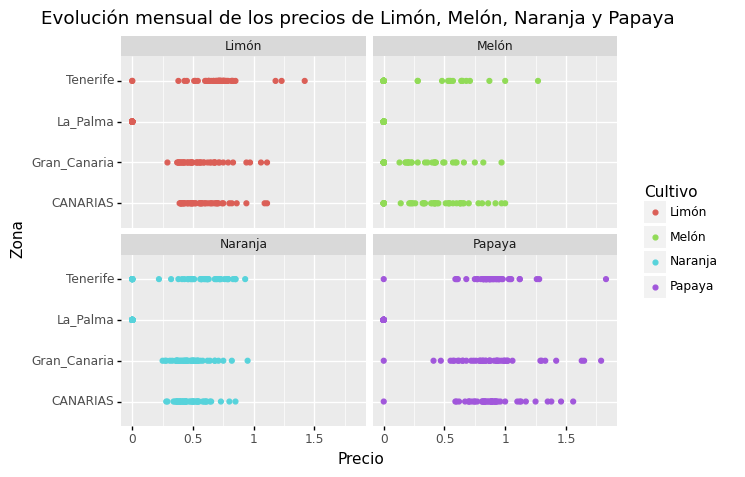

<ggplot: (152886056569)>

In [8]:
# Realizamos el gráfico de dispersión de cuatro cultivos
# ===========================================================

(ggplot(df[(df['Cultivo'] == 'Naranja') | (df['Cultivo'] == 'Limón')
          | (df['Cultivo'] == 'Melón') | (df['Cultivo'] == 'Papaya')], 
        aes('Precio', 'Zona', color='Cultivo'))
 + geom_point()
 + facet_wrap('~Cultivo')
 + labs(title='Evolución mensual de los precios de Limón, Melón, Naranja y Papaya '))

###### Conclusiones
asdahsjkdnsa

## 2.1 Gráfico de la evolución de la media mensual de precios de 4 cultivos en cada una de las islas.

In [9]:
# generamos una nueva columna con un formato fecha para facilitar su visualización
# ===========================================================
days = np.ones(len(df), dtype = int)
df['Día'] = days
df_p = df.copy()
df_p['mes'] = df_p['Mes']
df_p['mes'] = df_p['mes'].replace(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], np.arange(1,13))

df_p['Fecha'] = df_p['Año'].astype(str) + '-' + df_p['mes'].astype(str) + '-'+ df_p['Día'].astype(str)

df_p['Fecha'] = pd.to_datetime(df_p['Fecha'],yearfirst = True )


df_p.head()

,Zona,Cultivo,Año,Mes,Precio,Día,mes,Fecha
0,CANARIAS,Aguacate,2016,Enero,1.89,1,1,2016-01-01
1,CANARIAS,Aguacate,2016,Febrero,1.97,1,2,2016-02-01
2,CANARIAS,Aguacate,2016,Marzo,1.93,1,3,2016-03-01
3,CANARIAS,Aguacate,2016,Abril,2.09,1,4,2016-04-01
4,CANARIAS,Aguacate,2016,Mayo,2.42,1,5,2016-05-01


##### En este gráfico hemos utilizado los siguientes elementos:
- Carga del dataset aplicando filtrado de datos y utilizamos la nueva variable Fecha
- Mapeo de variables con aesthetics indicando el color de cada tipo de variable definir los ejes y añadir la leyenda para cada cultivo.
- Seleción de geom_point para el dibujado de gráfico de líneas y ver de mejor forma la evolución de los datos 
- Utilziación de la capa Theme para modificar las etiquetas del eje x y poderlas rotar a 90º.
- Utilización de la capa facet_wrap para cambiar datos de 1D a 2D y poder dedicar una gráfica a cada Cultivo.
- Utilización de la capa labs para añadir Título al gráfico

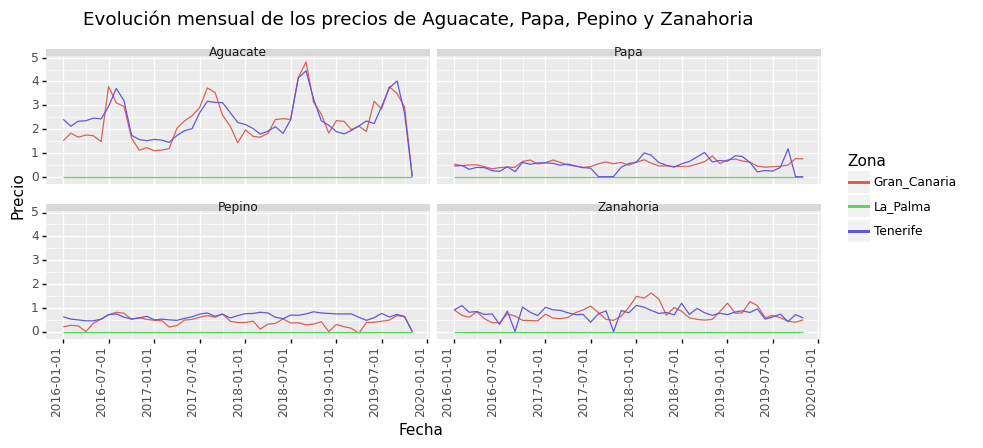

<ggplot: (152886670297)>

In [10]:
# https://stackoverflow.com/questions/47714540/plotnine-rotating-labels

(ggplot(df_p[((df_p['Cultivo'] == 'Pepino') | (df_p['Cultivo'] == 'Zanahoria')
          | (df_p['Cultivo'] == 'Papa') | (df_p['Cultivo'] == 'Aguacate')) & (df_p['Zona'] != 'CANARIAS')], 
       aes('Fecha', 'Precio', color='Zona'))
 + geom_line()
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3)
 + facet_wrap('~Cultivo')
 + labs(title='Evolución mensual de los precios de Aguacate, Papa, Pepino y Zanahoria '))


###### Conclusiones
qasdadadsa

## 3. Distribución de los precios de 4 cultivos en todas las islas.

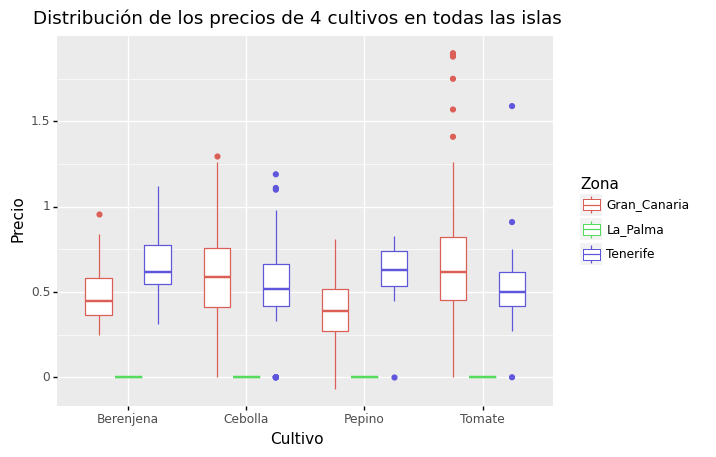

<ggplot: (152887058526)>

In [11]:
(ggplot(df[((df['Cultivo'] == 'Cebolla') | (df['Cultivo'] == 'Pepino')
          | (df['Cultivo'] == 'Tomate') | (df['Cultivo'] == 'Berenjena')) & (df['Zona'] != 'CANARIAS')], 
        aes('Cultivo', 'Precio', color='Zona'))
 + geom_boxplot()
 + labs(title='Distribución de los precios de 4 cultivos en todas las islas'))

### Datos de los puertos de españa
Realizar un análisis exploratorio de datos basado en gráficos.del dataset de Tráfico Marítimo utilizando la librería ggplot2 o su equivalente plotnine para python

In [25]:

# Making a GET request
r = requests.get('https://www.puertos.es/es-es/estadisticas/Paginas/estadistica_Historicas.aspx')
 
# Parsing the HTML
soup = BeautifulSoup(r.content, 'html.parser')

# print(soup)

file = BeautifulSoup(r.text, "lxml")
find_table = file.find('table', class_='table-responsive')
rows = find_table.find_all('tr')

data = []
table_data = []
for i in rows:
    table_data = i.find_all('td')
    data = np.append(data, [j.text for j in table_data])
    
    

# https://datagy.io/python-split-list-into-chunks/

# Split a Python List into Chunks using itertools
from itertools import zip_longest
# our_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
chunk_size = 11
chunked_list = list(zip_longest(*[iter(data)]*chunk_size, fillvalue=' '))
# print(chunked_list)
# Returns: [(1, 2, 3), (4, 5, 6), (7, 8, 9), (10, 11, '')]
chunked_list = [list(item) for item in list(zip_longest(*[iter(data)]*chunk_size, fillvalue=' '))]
# print(chunked_list)
# Returns: [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11]]


df_puertos = pd.DataFrame(data=chunked_list, columns=['Año', 'Autoridad Portuaria', 'Graneles Líquidos', 'Graneles Sólidos', 'Mercancía General', 'Pesca Fresca', 'Avitua- llamiento', 'Tráfico Local', 'TOTAL TRAFICO', 'TEUS', 'Buques'])
df_puertos.head()

,Año,Autoridad Portuaria,Graneles Líquidos,Graneles Sólidos,Mercancía General,Pesca Fresca,Avitua- llamiento,Tráfico Local,TOTAL TRAFICO,TEUS,Buques
0,2009,A Coruña ...,6.820.497,3.215.589,1.460.292,43.108,93.570,283.941,11.916.997,7.778,1.231
1,2009,Alicante ...,114.588,1.111.169,1.260.064,511,24.400,3,2.510.735,132.059,935
2,2009,Almería ...,1.502,3.291.672,542.994,4.037,117.334,0,3.957.539,1.425,1.999
3,2009,Avilés ...,673.268,2.293.135,984.041,13.590,35.981,0,4.000.015,2.575,700
4,2009,Bahía de Algeciras ...,20.142.781,1.743.479,42.316.996,2.168,3.375.642,2.329.889,69.910.955,3.043.268,24.852


In [26]:
df_puertos = df_puertos.drop(index = 1372, axis = 1)

In [27]:
df_puertos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1371
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  1372 non-null   object
 1   Autoridad Portuaria  1372 non-null   object
 2   Graneles Líquidos    1372 non-null   object
 3   Graneles Sólidos     1372 non-null   object
 4   Mercancía General    1372 non-null   object
 5   Pesca Fresca         1372 non-null   object
 6   Avitua- llamiento    1372 non-null   object
 7   Tráfico Local        1372 non-null   object
 8   TOTAL TRAFICO        1372 non-null   object
 9   TEUS                 1372 non-null   object
 10  Buques               1372 non-null   object
dtypes: object(11)
memory usage: 128.6+ KB


In [28]:
df_puertos.columns

Index(['Año', 'Autoridad Portuaria', 'Graneles Líquidos', 'Graneles Sólidos',
       'Mercancía General', 'Pesca Fresca', 'Avitua- llamiento',
       'Tráfico Local', 'TOTAL TRAFICO', 'TEUS', 'Buques'],
      dtype='object')

In [29]:
###### para poder covertir los valores a numéricos, se deben cambiar los . por ,
# https://note.nkmk.me/en/python-str-num-conversion/

# df_puertos = df_puertos.replace(['.'], [','])

# int(df_puertos.replace('.',''))
labels = ['Año','Graneles Líquidos', 'Graneles Sólidos',
       'Mercancía General', 'Pesca Fresca', 'Avitua- llamiento',
       'Tráfico Local', 'TOTAL TRAFICO', 'TEUS', 'Buques']

for a in labels:
    for i,x in enumerate(df_puertos[a]):
        df_puertos[a][i] = df_puertos[a][i].replace('.','')

for a in labels:
    df_puertos[a] = pd.to_numeric(df_puertos[a])
        
df_puertos.head()

,Año,Autoridad Portuaria,Graneles Líquidos,Graneles Sólidos,Mercancía General,Pesca Fresca,Avitua- llamiento,Tráfico Local,TOTAL TRAFICO,TEUS,Buques
0,2009,A Coruña ...,6820497,3215589,1460292,43108,93570,283941,11916997,7778,1231
1,2009,Alicante ...,114588,1111169,1260064,511,24400,3,2510735,132059,935
2,2009,Almería ...,1502,3291672,542994,4037,117334,0,3957539,1425,1999
3,2009,Avilés ...,673268,2293135,984041,13590,35981,0,4000015,2575,700
4,2009,Bahía de Algeciras ...,20142781,1743479,42316996,2168,3375642,2329889,69910955,3043268,24852


In [30]:
df_puertos['Autoridad Portuaria'].unique()

array(['A Coruña                                                                                            ',
       'Alicante                                                                                            ',
       'Almería                                                                                             ',
       'Avilés                                                                                              ',
       'Bahía de Algeciras                                                                                  ',
       'Bahía de Cádiz                                                                                      ',
       'Baleares                                                                                            ',
       'Barcelona                                                                                           ',
       'Bilbao                                                                                              ',
 

In [31]:
df_puertos = df_puertos.replace(['A Coruña                                                                                            ',
       'Alicante                                                                                            ',
       'Almería                                                                                             ',
       'Avilés                                                                                              ',
       'Bahía de Algeciras                                                                                  ',
       'Bahía de Cádiz                                                                                      ',
       'Baleares                                                                                            ',
       'Barcelona                                                                                           ',
       'Bilbao                                                                                              ',
       'Cartagena                                                                                           ',
       'Castellón                                                                                           ',
       'Ceuta                                                                                               ',
       'Ferrol-S. Cibrao                                                                                    ',
       'Gijón                                                                                               ',
       'Huelva                                                                                              ',
       'Las Palmas                                                                                          ',
       'Málaga                                                                                              ',
       'Marín y Ría de Pontevedra                                                                           ',
       'Melilla                                                                                             ',
       'Motril                                                                                              ',
       'Pasaia                                                                                              ',
       'Santa Cruz de Tenerife                                                                              ',
       'Santander                                                                                           ',
       'Sevilla                                                                                             ',
       'Tarragona                                                                                           ',
       'Valencia                                                                                            ',
       'Vigo                                                                                                ',
       'Vilagarcía                                                                                          ',
       'Almería-Motril                                                                                      ',
       'C.A.G.P                                                                                             ',
       'Puerto Sta. María                                                                                   ',
       'San Esteban de Pravia                                                                               '],['A Coruña',
       'Alicante',
       'Almería ',
       'Avilés',
       'Bahía de Algeciras',
       'Bahía de Cádiz',
       'Baleares',
       'Barcelona',
       'Bilbao',
       'Cartagena',
       'Castellón',
       'Ceuta ',
       'Ferrol-S. Cibrao  ',
       'Gijón',
       'Huelva',
       'Las Palmas',
       'Málaga',
       'Marín y Ría de Pontevedra',
       'Melilla',
       'Motril',
       'Pasaia',
       'Santa Cruz de Tenerife',
       'Santander',
       'Sevilla',
       'Tarragona',
       'Valencia',
       'Vigo',
       'Vilagarcía',
       'Almería-Motril',
       'C.A.G.P',
       'Puerto Sta. María',
       'San Esteban de Pravia'])

In [32]:
df_puertos['Autoridad Portuaria'].unique()

array(['A Coruña', 'Alicante', 'Almería ', 'Avilés', 'Bahía de Algeciras',
       'Bahía de Cádiz', 'Baleares', 'Barcelona', 'Bilbao', 'Cartagena',
       'Castellón', 'Ceuta ', 'Ferrol-S. Cibrao  ', 'Gijón', 'Huelva',
       'Las Palmas', 'Málaga', 'Marín y Ría de Pontevedra', 'Melilla',
       'Motril', 'Pasaia', 'Santa Cruz de Tenerife', 'Santander',
       'Sevilla', 'Tarragona', 'Valencia', 'Vigo', 'Vilagarcía',
       'Almería-Motril', 'C.A.G.P', 'Puerto Sta. María',
       'San Esteban de Pravia'], dtype=object)

In [33]:
df_puertos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1371
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  1372 non-null   int64 
 1   Autoridad Portuaria  1372 non-null   object
 2   Graneles Líquidos    1372 non-null   int64 
 3   Graneles Sólidos     1372 non-null   int64 
 4   Mercancía General    1372 non-null   int64 
 5   Pesca Fresca         1372 non-null   int64 
 6   Avitua- llamiento    1372 non-null   int64 
 7   Tráfico Local        1372 non-null   int64 
 8   TOTAL TRAFICO        1372 non-null   int64 
 9   TEUS                 1372 non-null   int64 
 10  Buques               1372 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 160.9+ KB


In [43]:
df_puertos.describe(include='all')

,Año,Autoridad Portuaria,Graneles Líquidos,Graneles Sólidos,Mercancía General,Pesca Fresca,Avitua- llamiento,Tráfico Local,TOTAL TRAFICO,TEUS,Buques
count,1372.000000,1372,1.372000e+03,1.372000e+03,1.372000e+03,1372.000000,1.372000e+03,1.372000e+03,1.372000e+03,1.372000e+03,1372.000000
unique,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1984.970845,NaN,3.645034e+06,2.202145e+06,2.283577e+06,30173.696793,3.054699e+05,1.175232e+05,8.583922e+06,1.201913e+05,3656.695335
std,13.890287,NaN,5.079657e+06,2.719275e+06,5.271746e+06,61078.629092,5.097211e+05,4.286656e+05,9.913718e+06,3.970353e+05,4223.259242
min,1962.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.592100e+04,0.000000e+00,3.000000
25%,1973.000000,NaN,2.214692e+05,3.590658e+05,3.337100e+05,2869.750000,5.115150e+04,0.000000e+00,2.390466e+06,0.000000e+00,1137.750000
50%,1985.000000,NaN,1.054674e+06,1.222728e+06,7.289905e+05,8286.500000,1.163985e+05,0.000000e+00,4.978488e+06,2.590000e+03,1872.000000
75%,1997.000000,NaN,6.063759e+06,3.025084e+06,1.797836e+06,20585.750000,2.904092e+05,1.948800e+04,1.170393e+07,5.826875e+04,4432.750000


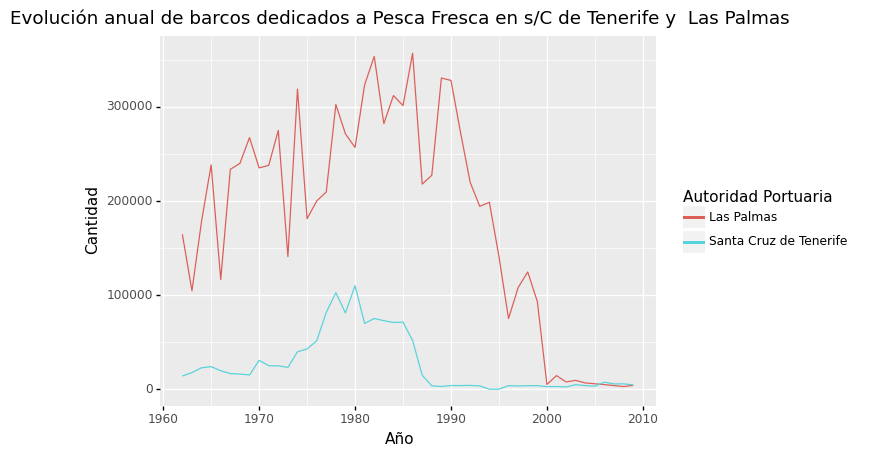

<ggplot: (152888583620)>

In [37]:
(ggplot(df_puertos[(df_puertos['Autoridad Portuaria'] == 'Santa Cruz de Tenerife') | (df_puertos['Autoridad Portuaria'] == 'Las Palmas')
          ], 
        aes('Año','Pesca Fresca', color='Autoridad Portuaria'))
 + geom_line()
#  + facet_wrap('~Cultivo')
 + labs(title='Evolución histórica de barcos dedicados a Pesca Fresca en s/C de Tenerife y  Las Palmas', y='Cantidad'))

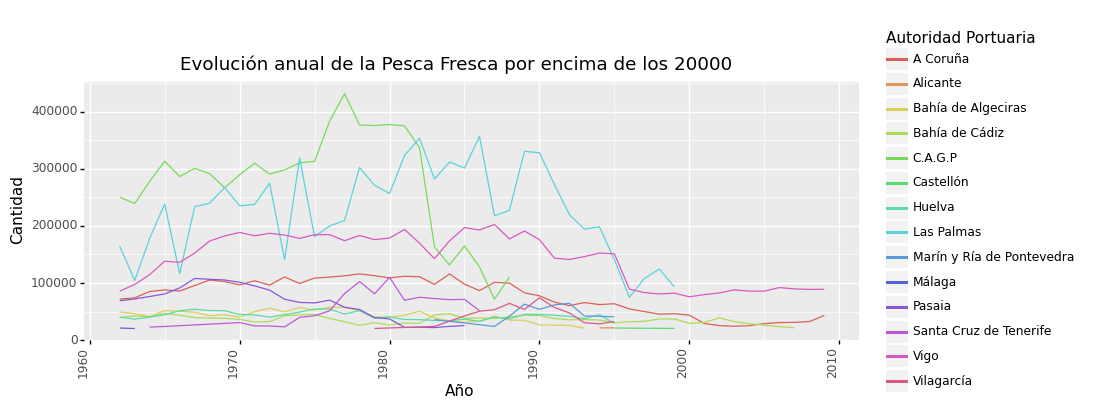

<ggplot: (152887507857)>

In [39]:
(ggplot(df_puertos[df_puertos['Pesca Fresca'] >= 20000], 
        aes('Año','Pesca Fresca', color = 'Autoridad Portuaria'))
 + geom_line()
#  + facet_wrap('Autoridad Portuaria')
 + labs(title='Evolución histórica de la Pesca Fresca por encima de los 20000 barcos', y = 'Cantidad')
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3))

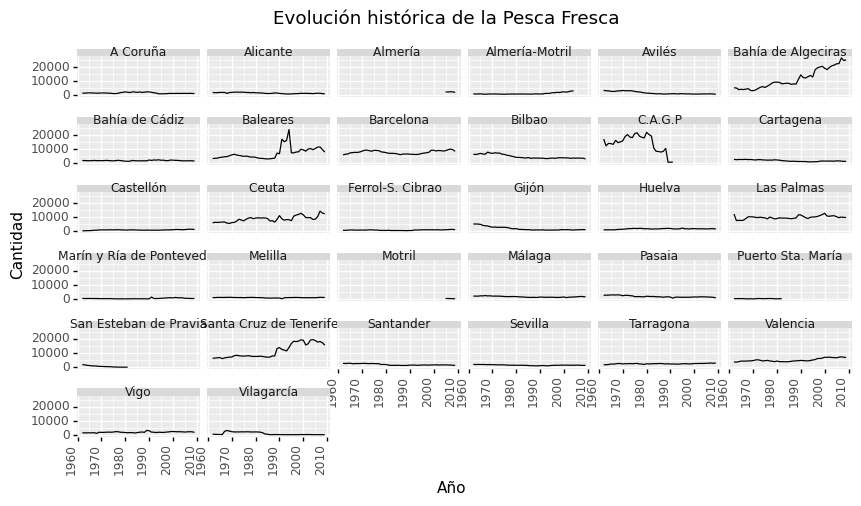

<ggplot: (152877381898)>

In [41]:
(ggplot(df_puertos, 
        aes('Año','Buques'))
 + geom_line()
 + facet_wrap('Autoridad Portuaria')
 + labs(title='Evolución histórica de la Pesca Fresca  ', y ='Cantidad')
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3))

In [44]:
df_test_1 = df_puertos[['Año', 'Mercancía General', 'Autoridad Portuaria']]
df_test_1.head()

,Año,Mercancía General,Autoridad Portuaria
0,2009,1460292,A Coruña
1,2009,1260064,Alicante
2,2009,542994,Almería
3,2009,984041,Avilés
4,2009,42316996,Bahía de Algeciras


,Año,Mercancía General,Autoridad Portuaria
Autoridad Portuaria,,,
A Coruña,1985.5,3.822407e+05,A Coruña
Alicante,1985.5,9.548046e+05,Alicante
Almería,2007.0,6.031208e+05,Almería
Almería-Motril,1983.0,2.788494e+05,Almería-Motril
Avilés,1985.5,1.450270e+06,Avilés


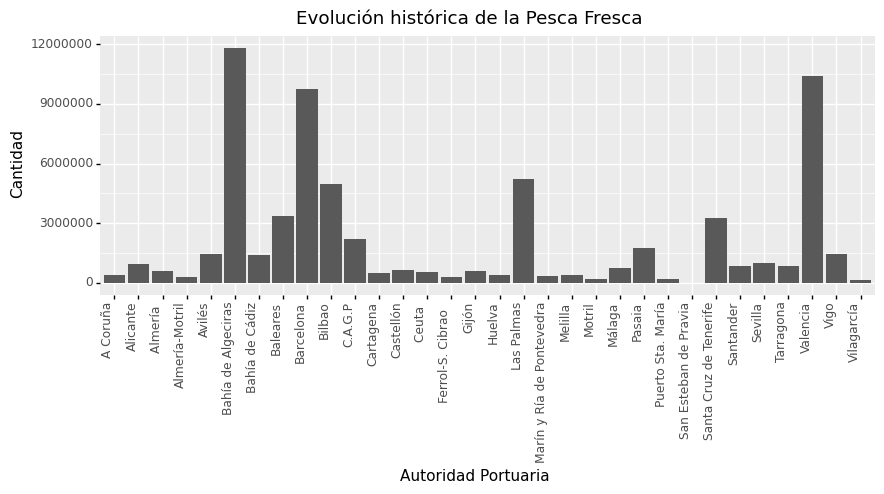

<ggplot: (152886803661)>

In [52]:
# https://realpython.com/ggplot-python/
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_col.html#two-variable-bar-plot

df_test_1 = df_puertos[['Año', 'Mercancía General', 'Autoridad Portuaria']]
df_test_1.head()

means = df_test_1.groupby('Autoridad Portuaria').mean()

means['Autoridad Portuaria'] = means.index
means.head()

(ggplot(means, 
        aes('Autoridad Portuaria','Mercancía General'))
 + geom_col()
#  + facet_wrap('Autoridad Portuaria')
 + labs(title='Medía de Mercancía general en todos los puertos', y ='Cantidad')
 + theme(axis_text_x=element_text(rotation=90, hjust=1), figure_size=(10,10),aspect_ratio=1/3))